# Física Experimental III - Laplaciano do Potencial

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import struct

In [34]:
N = 128
grid = np.zeros((N, N))

with open('grid', 'rb') as save: buffer = save.read(N * N *4)

for i in range(0, N):
	for j in range(0, N):
		grid[i][j] = struct.unpack('f', buffer[(i*N+j) * 4 : (i*N+j+1) * 4])[0]

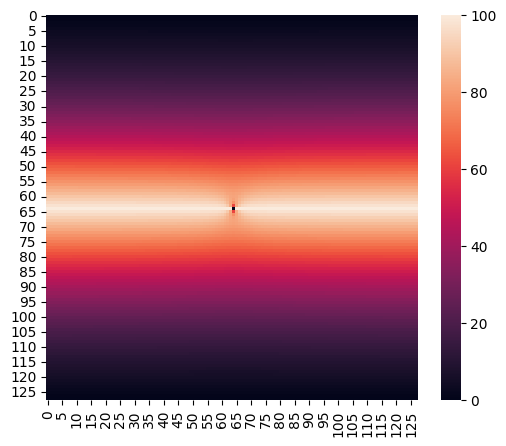

In [35]:
plt.figure(figsize=(6, 5))
sns.heatmap(grid)
plt.show()